## Inicializando Estruturas de Dados e Importações

In [18]:
import matplotlib.pyplot as plt

# Estrutura de dados para armazenar o desempenho dos alunos
desempenho_alunos = {}

# Estrutura de dados para armazenar resultados intermediários em forma de tabela
tabela_resultados = []

## Função de Registro de Feedback em Tabela

In [19]:
# Função para registrar feedback e resultados intermediários em uma tabela
def registrar_feedback_tabela(aluno, procedimento, resultado, acuracia, sugestoes=None):
    linha = [aluno, procedimento, resultado, acuracia, sugestoes]
    tabela_resultados.append(linha)

# Função para exibir os resultados em formato de tabela
def exibir_tabela_resultados():
    print(f"{'Aluno':<10} {'Procedimento':<20} {'Resultado':<10} {'Acurácia':<10} {'Sugestões':<20}")
    print("-" * 70)
    for linha in tabela_resultados:
        aluno, procedimento, resultado, acuracia, sugestoes = linha
        sugestoes_texto = sugestoes if sugestoes else "Nenhuma"
        print(f"{aluno:<10} {procedimento:<20} {resultado:<10} {acuracia:<10} {sugestoes_texto:<20}")

## Algoritmo de Dijkstra

In [20]:
# Função para verificar o próximo procedimento com base no feedback (usando Dijkstra sem heapq)
def dijkstra(grafo, inicio, aluno):
    distancias = {no: float('infinity') for no in grafo}
    distancias[inicio] = 0
    rota = {no: [] for no in grafo}
    visitados = []  # Lista de nós visitados
    
    while len(visitados) < len(grafo):
        # Seleciona o nó com a menor distância que ainda não foi visitado
        no_atual = None
        menor_distancia = float('infinity')
        
        for no in distancias:
            if no not in visitados and distancias[no] < menor_distancia:
                no_atual = no
                menor_distancia = distancias[no]
        
        if no_atual is None:
            break
        
        # Marca o nó como visitado
        visitados.append(no_atual)
        
        # Atualiza as distâncias para os vizinhos do nó atual
        for vizinho, peso in grafo[no_atual].items():
            nova_distancia = distancias[no_atual] + peso
            if nova_distancia < distancias[vizinho]:
                distancias[vizinho] = nova_distancia
                rota[vizinho] = rota[no_atual] + [vizinho]

    return rota, distancias

## Ajustar Pesos Dinamicamente no Grafo com Base no Feedback

In [21]:
# Ajustar os pesos dinamicamente no grafo com base no feedback
def ajustar_pesos_dinamicos(grafo, aluno, procedimento_atual, acuracia):
    if acuracia < 80:
        for vizinho, peso in grafo[procedimento_atual].items():
            grafo[procedimento_atual][vizinho] += 1  # Aumenta a dificuldade
        print(f"Pesos ajustados após falha no {procedimento_atual} para {aluno}.")
    else:
        for vizinho, peso in grafo[procedimento_atual].items():
            grafo[procedimento_atual][vizinho] = max(1, grafo[procedimento_atual][vizinho] - 1)
        print(f"Pesos ajustados após sucesso no {procedimento_atual} para {aluno}.")

## Sistema de Níveis para Alunos

In [22]:
# Sistema de níveis para restringir o acesso a procedimentos mais difíceis
def calcular_nivel(aluno, acuracia):
    if acuracia >= 90:
        return "Avançado"
    elif acuracia >= 80:
        return "Intermediário"
    else:
        return "Básico"

## Função de Processamento de Simulação com Sistema de Níveis e Dijkstra

In [23]:
# Função para processar a simulação e ajustar os pesos no grafo
def processar_simulacao_com_nivel(grafo, aluno, procedimento_atual, acuracia):
    nivel_atual = calcular_nivel(aluno, acuracia)
    print(f"{aluno} está no nível {nivel_atual}.")
    
    if nivel_atual == "Básico":
        print(f"{aluno} deve repetir procedimentos mais fáceis antes de avançar.")
        ajustar_pesos_dinamicos(grafo, aluno, procedimento_atual, acuracia)
    else:
        print(f"{aluno} pode tentar procedimentos mais avançados.")
    
    # Chamar Dijkstra para seguir com o próximo procedimento
    rota, distancias = dijkstra(grafo, procedimento_atual, aluno)
    proximo = rota[procedimento_atual][0] if rota[procedimento_atual] else "Finalizado"
    print(f"Próximo procedimento sugerido para {aluno}: {proximo}")
    
    # Registrar o feedback na tabela de resultados
    if acuracia >= 80:
        registrar_feedback_tabela(aluno, procedimento_atual, 'Aprovado', acuracia)
    else:
        registrar_feedback_tabela(aluno, procedimento_atual, 'Reprovado', acuracia, 'Rever técnicas e repetir procedimento.')

## Função para Visualizar o Desempenho em Gráficos

In [24]:
# Função para visualizar o desempenho do aluno ao longo do tempo
def gerar_grafico_desempenho(aluno):
    acuracias = [entrada[3] for entrada in tabela_resultados if entrada[0] == aluno]
    procedimentos = [entrada[1] for entrada in tabela_resultados if entrada[0] == aluno]
    
    plt.figure(figsize=(10, 5))
    plt.plot(procedimentos, acuracias, marker='o')
    plt.title(f"Evolução do Desempenho de {aluno}")
    plt.xlabel("Procedimento")
    plt.ylabel("Acurácia (%)")
    plt.ylim(0, 100)
    plt.grid(True)
    plt.show()

## Definição do Grafo de Procedimentos e Execução de Testes

João está no nível Básico.
João deve repetir procedimentos mais fáceis antes de avançar.
Pesos ajustados após falha no Procedimento A para João.
Próximo procedimento sugerido para João: Finalizado
João está no nível Intermediário.
João pode tentar procedimentos mais avançados.
Próximo procedimento sugerido para João: Finalizado
João está no nível Básico.
João deve repetir procedimentos mais fáceis antes de avançar.
Pesos ajustados após falha no Procedimento C para João.
Próximo procedimento sugerido para João: Finalizado

Resultados Intermediários em Tabela:
Aluno      Procedimento         Resultado  Acurácia   Sugestões           
----------------------------------------------------------------------
João       Procedimento A       Reprovado  75         Rever técnicas e repetir procedimento.
João       Procedimento B       Aprovado   85         Nenhuma             
João       Procedimento C       Reprovado  65         Rever técnicas e repetir procedimento.


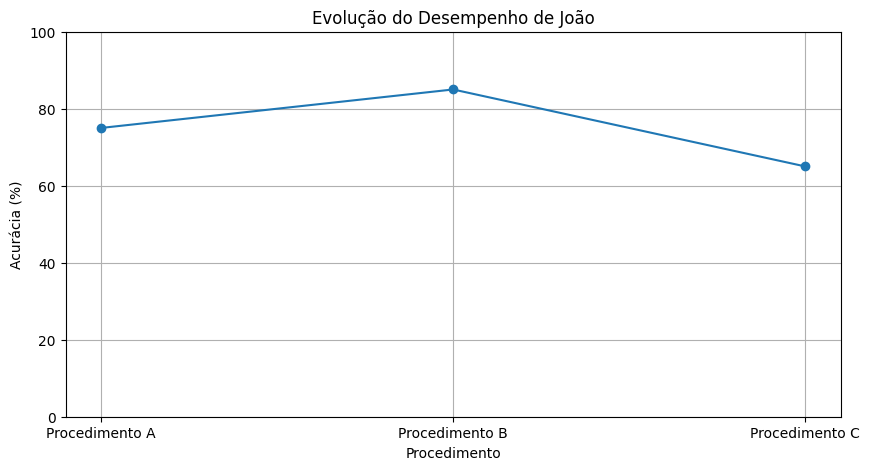

In [25]:
# Definição do grafo dos procedimentos com base na "dificuldade" de transição entre eles
grafo_procedimentos = {
    'Procedimento A': {'Procedimento B': 1, 'Procedimento C': 4},
    'Procedimento B': {'Procedimento A': 1, 'Procedimento D': 2, 'Procedimento C': 2},
    'Procedimento C': {'Procedimento A': 4, 'Procedimento B': 2, 'Procedimento D': 1},
    'Procedimento D': {'Procedimento B': 2, 'Procedimento C': 1}
}

# Executar simulações para o aluno "João"
processar_simulacao_com_nivel(grafo_procedimentos, "João", "Procedimento A", 75)
processar_simulacao_com_nivel(grafo_procedimentos, "João", "Procedimento B", 85)
processar_simulacao_com_nivel(grafo_procedimentos, "João", "Procedimento C", 65)

# Exibir a tabela de resultados após simulações
print("\nResultados Intermediários em Tabela:")
exibir_tabela_resultados()

# Gerar o gráfico de desempenho do aluno "João"
gerar_grafico_desempenho("João")